# Correlation
-----
- Correlation values range between -1 and 1.
- There are two key components of a correlation value:
    - Magnitude
        - The larger the magnitude (closer to 1 or -1), the stronger the correlation
    - Sign
        - If negative, there is an inverse correlation.
        - If positive, there is a positive correlation

[Read it](https://corporatefinanceinstitute.com/resources/knowledge/finance/correlation/)

## Positive correlation(0+ to +1)

In [2]:
import numpy as np

In [3]:
np.random.seed(1) # reproduciability #  Seed must be between 0 and 2**32 - 1
x = np.random.randint(0,50,1000)
y = x + np.random.normal(0,10,1000)

In [4]:
np.corrcoef(x,y)

array([[1.        , 0.81543901],
       [0.81543901, 1.        ]])

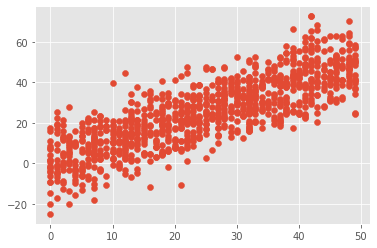

In [6]:
import matplotlib.pyplot as plt
plt.matplotlib.style.use('ggplot')
plt.scatter(x, y)
plt.show()

## -ve correlation

In [7]:
np.random.seed(1) # reproduciability #  Seed must be between 0 and 2**32 - 1
# 1000 random integers between 0 and 50
x = np.random.randint(0, 50, 1000)
# Negative Correlation with some noise
y = 100 - x + np.random.normal(0, 5, 1000)

In [8]:
np.corrcoef(x, y)

array([[ 1.        , -0.94363236],
       [-0.94363236,  1.        ]])

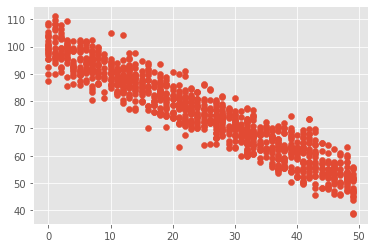

In [9]:
plt.scatter(x, y)
plt.show()

## No Correlation

In [10]:
np.random.seed(1) # reproduciability #  Seed must be between 0 and 2**32 - 1
x = np.random.randint(0, 50, 1000)
y = np.random.randint(0, 50, 1000)

In [11]:
np.corrcoef(x, y)

array([[1.        , 0.00404702],
       [0.00404702, 1.        ]])

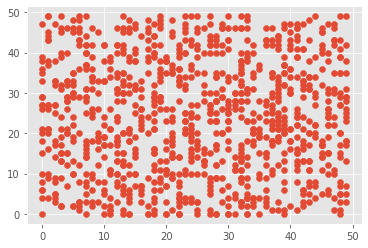

In [12]:
plt.scatter(x,y)
plt.show()

## Correlation Matrix

In [13]:
import pandas as pd
import numpy as np
df = pd.DataFrame({'a': np.random.randint(0, 50, 1000)})
df['b'] = df['a'] + np.random.normal(0, 10, 1000) # positively correlated with 'a'
df['c'] = 100 - df['a'] + np.random.normal(0, 5, 1000) # negatively correlated with 'a'
df['d'] = np.random.randint(0, 50, 1000) # not correlated with 'a'

In [14]:
df[:10]

,a,b,c,d
0,37,40.965519,66.264598,9
1,16,23.190647,73.664131,43
2,25,44.678859,80.525157,0
3,43,39.800824,59.968067,9
4,46,51.453126,55.020292,1
5,7,12.579766,98.848691,17
6,43,34.286110,50.701275,15
7,0,-7.169283,101.999839,22
8,14,25.395514,83.225794,19
9,14,11.677677,83.805019,15


In [15]:
df.corr()

,a,b,c,d
a,1.000000,0.821847,-0.944769,0.044873
b,0.821847,1.000000,-0.773454,0.015559
c,-0.944769,-0.773454,1.000000,-0.043849
d,0.044873,0.015559,-0.043849,1.000000


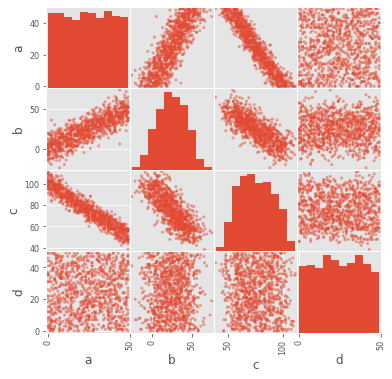

In [22]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(6, 6))
plt.show()

## correlation matrix plot

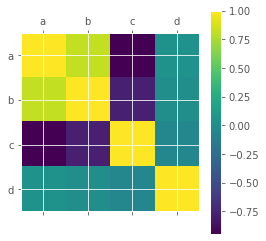

In [23]:
# heat map
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)), df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

## Explore around Spurious/fake correlation
- Can I believe blindly correlation value or we need to use bit common sense??
- [refer](http://www.tylervigen.com/spurious-correlations)


## Auto correlation

In [22]:
import os 
os.chdir("C:\\Users\\ramreddymyla\\Google Drive\\01 DS ML DL NLP and AI With Python Lab Copy\\02 Lab Data\\Python")

In [24]:
import pandas as pd 
# Load Microsoft stock data
df = pd.read_csv("MSFT.csv",index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1258 entries, 8/6/2012 to 8/4/2017
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7+ KB


In [25]:
# Convert the date index to datetime
df.index = pd.to_datetime(df.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
Adj Close    1258 non-null float64
dtypes: float64(1)
memory usage: 19.7 KB


In [26]:
# Convert the daily data to weekly data
df = df.resample(rule='W', how='last')
df.head()

C:\Users\ramreddymyla\Anaconda3\envs\dl\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  


,Adj Close
Date,
2012-08-12,26.517351
2012-08-19,27.114212
2012-08-26,26.815865
2012-09-02,27.044012
2012-09-09,27.158091


In [27]:
# Compute the percentage change of prices
returns = df.pct_change()

In [28]:
returns.head()

,Adj Close
Date,
2012-08-12,NaN
2012-08-19,0.022508
2012-08-26,-0.011003
2012-09-02,0.008508
2012-09-09,0.004218


In [29]:
# Compute and print the autocorrelation of returns
autocorrelation = returns['Adj Close'].autocorr()
print("The autocorrelation of weekly returns is %4.2f" %(autocorrelation))

The autocorrelation of weekly returns is -0.16
